모델에 데이터를 적합하기 전에 데이터 셋을 전처리 분석에 필요한 feature 가공 및 추출

1. Null Value 처리
2. 변수 유형 파악 및 올바른 데이터 타입 설정
3. Outlier 처리
4. Categorical 변수 처리
5. 파생변수 생성

<br></br><br></br>
의논점
1. del_col_list = ['NC_GRADE_PRICE', 'NEWCARPRIC'] # Shippin price만 사용한다고 생각하여 없앴음
2. 가격 int범위 2e9 넘어가는지 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000
import seaborn as sns
import missingno as msno 

# data read
df = pd.read_csv('Kia_dataset.csv', encoding='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'
print(df.head())
print("@데이터 차원 확인\n","(데이터 수, 변수) =",df.shape,"\n\n")
print(df.info(verbose=True))

categorical_var_list = [
    'GOODNO', 'CARNM', 'CHASNO', 'YEAR','YEARCHK', 'INNEEXPOCLASCD_YN', 'MISSNM', 'FUELNM', 'COLOR',
    'OWNECLASNM', 'USEUSENM', 'MF_KEY', 'MJ_MODEL_KEY', 'DT_MODEL_KEY', 'MJ_GRADE_KEY',
    'DT_GRADE_KEY', 'NC_GRADE_KEY'
]
numeric_var_list = [
    'SHIPPING_PRICE', 'SUCCPRIC', 'TRAVDIST', 'EXHA','NEWCARPRIC','NC_GRADE_PRICE',
    'BONET', 'FRONT_LEFT_FENDER', 'FRONT_RIGHT_FENDER',
    'FRONT_LEFT_DOOR', 'FRONT_RIGHT_DOOR', 'BACK_LEFT_DOOR', 'BACK_RIGHT_DOOR', 'TRUNK',
    'FRONT_PANNEL', 'LEFT_STEP', 'RIGHT_STEP', 'LEFT_FILER_A', 'RIGHT_FILER_A',
    'LEFT_FILER_B', 'RIGHT_FILER_B', 'LEFT_FILER_C', 'RIGHT_FILER_C', 'LEFT_REAR_FENDER',
    'RIGHT_REAR_FENDER', 'BACK_PANEL1', 'LEFT_INSIDE_PANEL', 'RIGHT_INSIDE_PANEL',
    'LEFT_WHEEL_HOUSE', 'RIGHT_WHEEL_HOUSE', 'LEFT_INSIDE_WHEEL_HOUSE',
    'RIGHT_INSIDE_WHEEL_HOUSE', 'LEFT_REAR_WHEEL_HOUSE', 'RIGHT_REAR_WHEEL_HOUSE',
    'TRUNK_FLOOR', 'DASH_PANEL', 'SHEET_PANEL', 'SIDE_MEMBER_FRAME', 'LEFT_QUARTER',
    'RIGHT_QUARTER', 'FLOOR_PANEL', 'LEFT_SIDE_PANEL', 'RIGHT_SIDE_PANEL',
    'LEFT_REAR_CORNER_PANEL', 'RIGHT_REAR_CORNER_PANEL', 'BACK_PANEL2',
    'LEFT_CORNER_PANEL', 'RIGHT_CORNER_PANEL', 'LEFT_SKIRT_PANEL', 'RIGHT_SKIRT_PANEL',
    'SIDE_MEMBER_FRAME2', 'LEFT_INSIDE_SHEETING', 'RIGHT_INSIDE_SHEETING',
    'LEFT_WHEEL_HOUSE_SHEETING', 'RIGHT_WHEEL_HOUSE_SHEETING',
    'LEFT_REAR_INSIDE_PANEL_SHEETING', 'RIGHT_REAR_INSIDE_PANEL_SHEETING',
    'LEFT_REAR_WHEEL_HOUSE_SHEETING', 'RIGHT_REAR_WHEEL_HOUSE_SHEETING',
    'TRUNK_FLOOR_SHEETING', 'DASH_PANEL_SHEETING', 'SHEET_BACK_PANEL_SHEETING',
    'SIDE_MEMBER_FRAME_SHEETING', 'FLOOR_PANEL_SHEETING', 'LEFT_SIDE_PANEL_SHEETING',
    'RIGHT_SIDE_PANEL_SHEETING', 'FLOODING', 'TOTAL_LOSS', 'JOINCAR', 'NOTAVAILABLE',
    'ABS', 'AB2', 'NAVIGATION', 'VDC', 'SMARTKEY', 'SUNLOOPPANORAMA', 'SUNLOOPCOMMON',
    'SUNLOOPDUAL', 'DIS', 'TCS', 'AB1', 'ETC', 'AV', 'EPS', 'ECS'
]

missing_list =[
    'SHIPPING_PRICE', 'NC_GRADE_PRICE', 'NEWCARPRIC', 'SUCCPRIC', 'TRAVDIST', 'EXHA',  
    'MF_KEY', 'MJ_MODEL_KEY', 'DT_MODEL_KEY', 'MJ_GRADE_KEY','DT_GRADE_KEY','NC_GRADE_KEY'
]

      GOODNO   SUCCYMD                     CARNM             CHASNO  \
0  1512A2469  20160105     모닝 LPi LX 기본 블랙 프리미엄   KNABK518BBT020038   
1  1512A2364  20160105  K3 1.6 가솔린(4도어) Nobless   KNAFZ412BDA040155   
2  1512A2319  20160105   K3 1.6 가솔린(4도어) Trendy   KNAFK412BEA206484   
3  1512A1643  20160105        K5 2.0LPI 렌터카 디럭스   KNAGN418BDA366086   
4  1512A1371  20160105        K5 2.0LPI 렌터카 스마트   KNAGN415BBA140279   

   CARREGIYMD  YEAR MISSNM FUELNM COLOR  EXHA  ...  SUNLOOPPANORAMA  \
0  20100616.0  2011    A/T    LPG     C  1000  ...                0   
1  20130207.0  2013    A/T    가솔린     A  1600  ...                0   
2  20140128.0  2014    A/T    가솔린     A  1591  ...                0   
3  20121218.0  2013    A/T    LPG     B  2000  ...                0   
4  20110428.0  2011    A/T    LPG     D  2000  ...                0   

  SUNLOOPCOMMON SUNLOOPDUAL DIS  TCS  AB1 ETC  AV  EPS  ECS  
0             0           0   0    0    1   0   0    0    0  
1             0       

column CARREGIYMD have 1 null value
column FUELNM have 1 null value
column EXHA have 3 null value
column USEUSENM have 323 null value
column OWNECLASNM have 13 null value
column NEWCARPRIC have 4470 null value
column DT_MODEL_KEY have 3 null value
column MJ_GRADE_KEY have 33 null value
column DT_GRADE_KEY have 584 null value
column NC_GRADE_KEY have 3601 null value
column SHIPPING_PRICE have 4460 null value
column NC_GRADE_PRICE have 3781 null value
AxesSubplot(0.125,0.125;0.698618x0.755)
GOODNO                                 0
SUCCYMD                                0
CARNM                                  0
CHASNO                                 0
CARREGIYMD                             1
YEAR                                   0
MISSNM                                 0
FUELNM                                 1
COLOR                                  0
EXHA                                   3
TRAVDIST                               0
USEUSENM                             323
OWNECLASNM    

,GOODNO,SUCCYMD,CARNM,CHASNO,CARREGIYMD,YEAR,MISSNM,FUELNM,COLOR,EXHA,...,SUNLOOPPANORAMA,SUNLOOPCOMMON,SUNLOOPDUAL,DIS,TCS,AB1,ETC,AV,EPS,ECS
0,1512A2469,20160105,모닝 LPi LX 기본 블랙 프리미엄,KNABK518BBT020038,20100616.0,2011,A/T,LPG,C,1000.0,...,0,0,0,0,0,1,0,0,0,0
1,1512A2364,20160105,K3 1.6 가솔린(4도어) Nobless,KNAFZ412BDA040155,20130207.0,2013,A/T,가솔린,A,1600.0,...,0,0,0,0,0,0,0,1,0,0
2,1512A2319,20160105,K3 1.6 가솔린(4도어) Trendy,KNAFK412BEA206484,20140128.0,2014,A/T,가솔린,A,1591.0,...,0,0,0,0,0,0,0,1,0,0
3,1512A1643,20160105,K5 2.0LPI 렌터카 디럭스,KNAGN418BDA366086,20121218.0,2013,A/T,LPG,B,2000.0,...,0,0,0,0,0,0,0,0,0,0
4,1512A1371,20160105,K5 2.0LPI 렌터카 스마트,KNAGN415BBA140279,20110428.0,2011,A/T,LPG,D,2000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36789,1905C0711,20190523,더뉴모닝 1.0가솔린 Deluxe,KNABE511BGT021147,20150216.0,2016,A/T,가솔린,A,998.0,...,0,0,0,0,0,0,0,0,0,0
36790,1905C0899,20190523,더뉴K9 V6 3.8 EXECUTIVE(이그제큐티브),KNALT413BFS025606,20141218.0,2015,A/T,가솔린,D,3778.0,...,0,0,0,0,0,0,0,0,0,0
36791,1905C0140,20190523,더뉴K9 V6 3.3 PRESTIGE(프레스티지),KNALT411BFS028524,20150506.0,2015,A/T,가솔린,B,3342.0,...,0,1,0,0,0,0,0,0,0,0
36792,1905C0350,20190523,더뉴K5 2.0 LPI 렌터카 디럭스,KNAGN418BFA544130,20140718.0,2015,A/T,LPG,A,1999.0,...,0,0,0,0,0,0,0,0,0,0


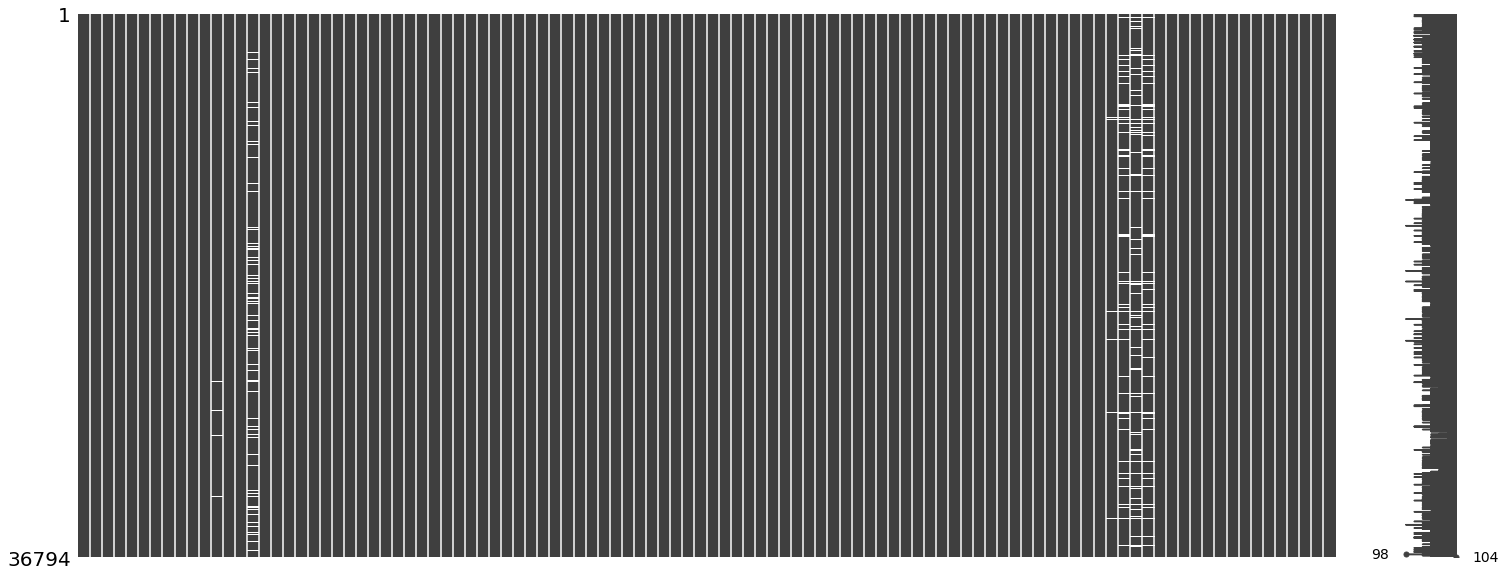

In [6]:
#1. Null Value 처리

#1-1 각 컬럼별로 null 값의 비율을 확인
def NullFunc(df_):
    #0값 결측값으로 변환
    for i in missing_list:
        df[i] = df[i].replace(0, np.nan)
        df[i] = df[i].replace('0', np.nan)

    for i in df.columns:
        X_i = df.loc[:, i]
        notNullRatio = X_i.dropna().shape[0] / df.shape[0]
        if (notNullRatio != 1):
            print("column {} have {} null value".format(i, df.shape[0]-X_i.dropna().shape[0])
                  )
            #del_col_list.append(i) 결측값 많을 시 추가
    print(msno.matrix(df))
    print(df.isnull().sum())
    return df_

NullFunc(df)

AxesSubplot(0.125,0.125;0.698618x0.755)


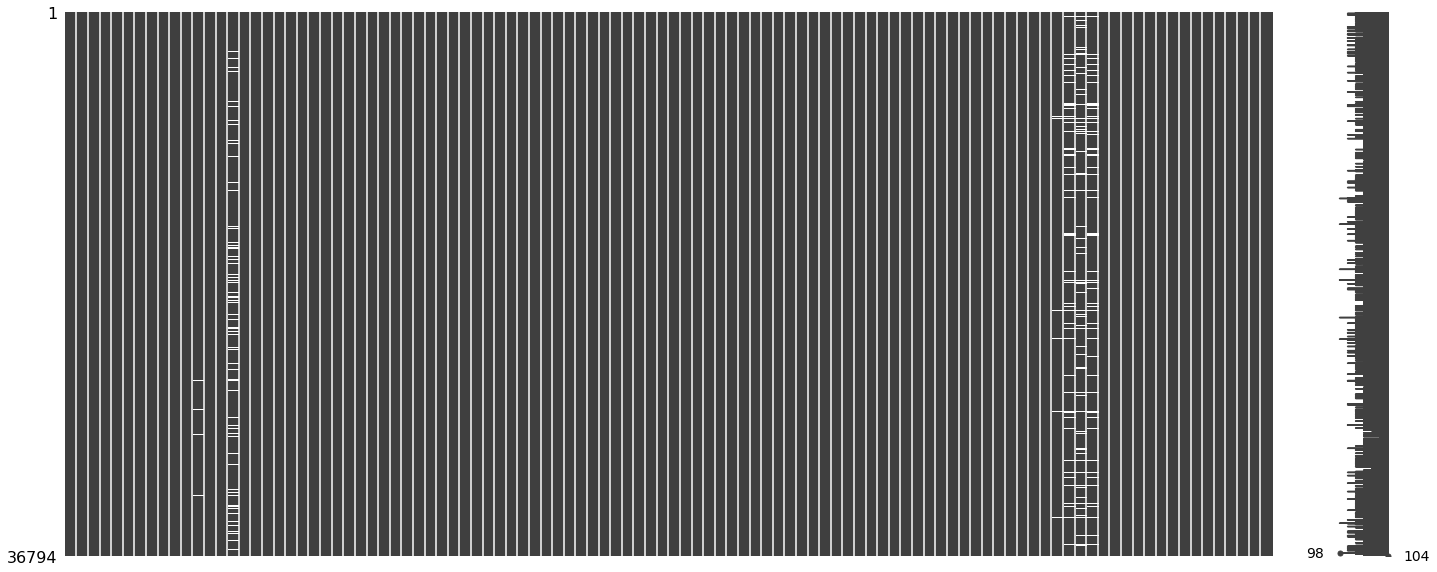

In [4]:
print(msno.matrix(df))


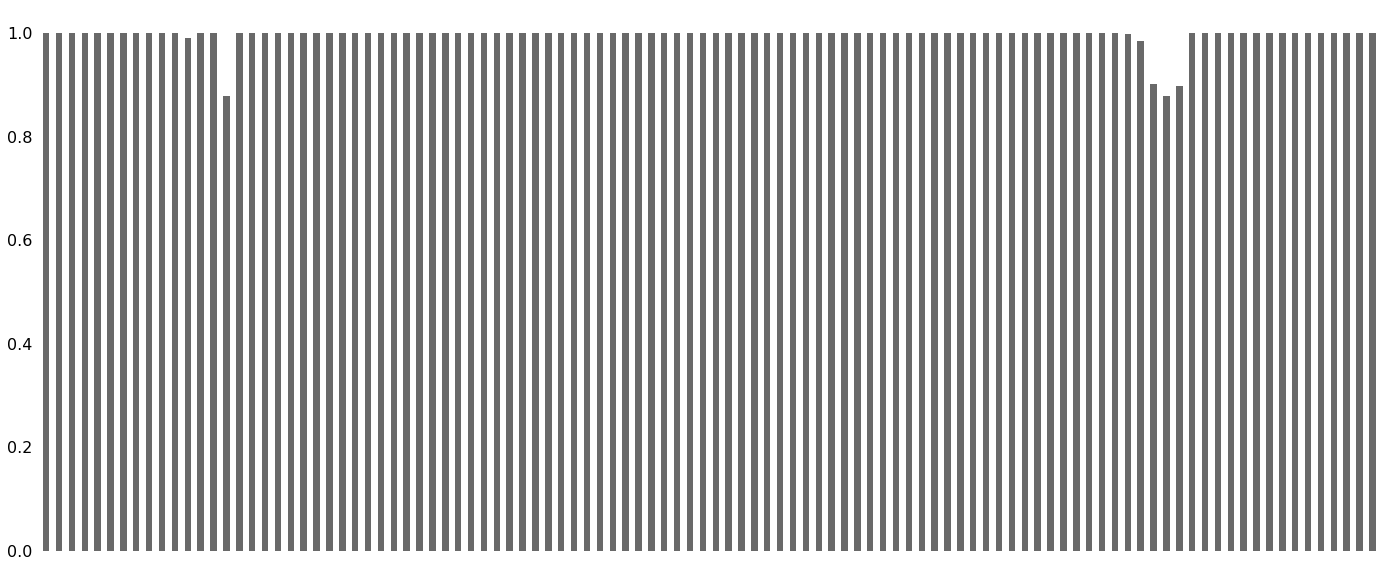

In [5]:
msno.bar(df)

In [272]:
#2. 변수 유형 파악 및 올바른 데이터 타입 설정
import datetime
import math
def ChangeType(df_):
    
   #2-1 값 대체
   #YEARCHK (Y, N) -> (1, 0)
   for i in np.where(df_['YEARCHK']=='Y'):
    df_['YEARCHK'][i]=1
   for i in np.where(df_['YEARCHK']=='N'):
    df_['YEARCHK'][i]=0

   #INNEEXPOCLASCD_YN (O, X) -> (1, 0)
   for i in np.where(df_['INNEEXPOCLASCD_YN']=='O'):
    df_['INNEEXPOCLASCD_YN'][i]=1
   for i in np.where(df_['INNEEXPOCLASCD_YN']=='X'):
    df_['INNEEXPOCLASCD_YN'][i]=0
    
   #2-2 categoric, numeric 변환
    for i in numeric_var_list:
        df_[i]=df_[i].astype('int64', errors='ignore')
    for i in categorical_var_list:
        df_[i]=df_[i].astype('object', errors='ignore')
    

    #2-3 datetime 변환
    df_['SUCCYMD'] = pd.to_datetime(df['SUCCYMD'], format='%Y%m%d') 
    df_['CARREGIYMD'] = pd.to_datetime(df['CARREGIYMD'], format='%Y%m%d') 
    print(df_.dtypes)
    return df_


df.dtypes


GOODNO                               object
SUCCYMD                               int64
CARNM                                object
CHASNO                               object
CARREGIYMD                          float64
YEAR                                  int64
MISSNM                               object
FUELNM                               object
COLOR                                object
EXHA                                float64
TRAVDIST                              int64
USEUSENM                             object
OWNECLASNM                           object
INNEEXPOCLASCD_YN                    object
NEWCARPRIC                          float64
SUCCPRIC                              int64
YEARCHK                              object
BONET                                 int64
FRONT_LEFT_FENDER                     int64
FRONT_RIGHT_FENDER                    int64
FRONT_LEFT_DOOR                       int64
FRONT_RIGHT_DOOR                      int64
BACK_LEFT_DOOR                  

In [273]:
outlier8 = np.where((df['NEWCARPRIC']==1))
print(np.asarray(outlier8).shape)

(1, 6819)


In [251]:
outlier1 = np.where((df['EXHA']>ub_1))
print(np.asarray(outlier1).shape)
outlier2 = np.where((df['TRAVDIST']<lb_2))
print(np.asarray(outlier2).shape)
outlier3 = np.where((df['TRAVDIST']>ub_2))
print(np.asarray(outlier3).shape)

outlier4 = np.where((df['NC_GRADE_PRICE']>ub_3))
print(np.asarray(outlier4).shape)

outlier5 = np.where((df['SHIPPING_PRICE']<5000000))
print(np.asarray(outlier5).shape)

outlier6 = np.where((df['SHIPPING_PRICE']>ub_4))
print(np.asarray(outlier6).shape)

outlier7 = np.where((df['NEWCARPRIC']<5000000))
print(np.asarray(outlier7).shape)

outlier8 = np.where((df['NEWCARPRIC']>ub_5))
print(np.asarray(outlier8).shape)

outlier9 = np.where((df['SUCCPRIC']>ub_6) )
print(np.asarray(outlier9).shape)


(1, 104)
(1, 368)
(1, 368)
(1, 274)
(1, 23)
(1, 319)
(1, 6895)
(1, 367)
(1, 368)


In [274]:
#missinglist
def nan_carprice(x):
    if x<10000:
        return np.nan
df['NEWCARPRIC'] = df['NEWCARPRIC'].map(nan_carprice)


In [275]:
#3. Outlier 처리

# numeric var :'SHIPPING_PRICE', 'SUCCPRIC', 'TRAVDIST', 'EXHA'
def remove_outliers(df_):
    originDataNum = df_.shape[0]
    #배기량은 하위 1%, 상위 1% outlier 처리
    lb_1, ub_1 = np.nanpercentile(df_['EXHA'],[1,99])
    #주행거리는 상위 1% outlier 처리
    lb_2, ub_2 = np.nanpercentile(df_['TRAVDIST'],[1,99])
    #신차등급가격, 출고가, 신차금액은 상위 1% 및 500만원 이하 outlier 처리
    #lb_3 = np.where(df_['NC_GRADE_PRICE']<5000000) 해당 값이 없어서 생략
    ub_3 = np.nanpercentile(df_['NC_GRADE_PRICE'],99)
    lb_4 = np.where(df_['SHIPPING_PRICE']<5000000)
    ub_4 = np.nanpercentile(df_['SHIPPING_PRICE'],99)
    lb_5 = np.where(df_['NEWCARPRIC']<5000000)
    ub_5 = np.nanpercentile(df_['NEWCARPRIC'],99)
    #낙찰가는 상위 1% outlier 처리
    ub_6 = np.nanpercentile(df_['SUCCPRIC'],99)

    outliers = np.where((df_['EXHA']<lb_1)|(df_['EXHA']>ub_1)
                       |(df_['TRAVDIST']<lb_2)|(df_['TRAVDIST']>ub_2)
                       |(df_['NC_GRADE_PRICE']>ub_3)
                       |(df_['SHIPPING_PRICE']<5000000)|(df_['SHIPPING_PRICE']>ub_4)
                       |(df_['NEWCARPRIC']<5000000)|(df_['NEWCARPRIC']>ub_5)
                       |(df_['SUCCPRIC']>ub_6)
                       )
    df_ = df_.drop(df_.index[outliers[0]])
    
    print("제거된 행 수" , originDataNum-df_.shape[0])    
    return df_

df = remove_outliers(df)

제거된 행 수 1487


D:\Hyun\Daejjyu\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


In [290]:
#4. Categorical 변수 처리
# one hot encoding
# mean encoding

In [291]:
#5. 파생변수 생성
#기존사용자의 시간 생성
등록일 - 낙찰일자 = 기존사용자의 사용시간
CHASNO차대번호 맨앞글자 국가



SyntaxError: invalid syntax (<ipython-input-291-d9be3ca0ea19>, line 3)

In [279]:
for col in df.columns: 
    print(col) 

GOODNO
SUCCYMD
CARNM
CHASNO
CARREGIYMD
YEAR
MISSNM
FUELNM
COLOR
EXHA
TRAVDIST
USEUSENM
OWNECLASNM
INNEEXPOCLASCD_YN
NEWCARPRIC
SUCCPRIC
YEARCHK
BONET
FRONT_LEFT_FENDER
FRONT_RIGHT_FENDER
FRONT_LEFT_DOOR
FRONT_RIGHT_DOOR
BACK_LEFT_DOOR
BACK_RIGHT_DOOR
TRUNK
FRONT_PANNEL
LEFT_STEP
RIGHT_STEP
LEFT_FILER_A
RIGHT_FILER_A
LEFT_FILER_B
RIGHT_FILER_B
LEFT_FILER_C
RIGHT_FILER_C
LEFT_REAR_FENDER
RIGHT_REAR_FENDER
BACK_PANEL1
LEFT_INSIDE_PANEL
RIGHT_INSIDE_PANEL
LEFT_WHEEL_HOUSE
RIGHT_WHEEL_HOUSE
LEFT_INSIDE_WHEEL_HOUSE
RIGHT_INSIDE_WHEEL_HOUSE
LEFT_REAR_WHEEL_HOUSE
RIGHT_REAR_WHEEL_HOUSE
TRUNK_FLOOR
DASH_PANEL
SHEET_PANEL
SIDE_MEMBER_FRAME
LEFT_QUARTER
RIGHT_QUARTER
FLOOR_PANEL
LEFT_SIDE_PANEL
RIGHT_SIDE_PANEL
LEFT_REAR_CORNER_PANEL
RIGHT_REAR_CORNER_PANEL
BACK_PANEL2
LEFT_CORNER_PANEL
RIGHT_CORNER_PANEL
LEFT_SKIRT_PANEL
RIGHT_SKIRT_PANEL
SIDE_MEMBER_FRAME2
LEFT_INSIDE_SHEETING
RIGHT_INSIDE_SHEETING
LEFT_WHEEL_HOUSE_SHEETING
RIGHT_WHEEL_HOUSE_SHEETING
LEFT_REAR_INSIDE_PANEL_SHEETING
RIGHT_REAR_I

In [ ]:
#6. 노멀라이징

In [ ]:
#7. 모델 파라미터 서치

In [ ]:
#8. 모델 중요도 분석

In [ ]:
#9. 샘플 테스트 코드

In [292]:
np.mean(df['YEARCHK']=='Y')
dfy = df[df['YEARCHK']=='Y']
np.mean(dfy['SUCCPRIC'])

8766439.110328121

In [293]:
np.mean(df['YEARCHK']=='N')
dfn = df[df['YEARCHK']=='N']
np.mean(dfn['SUCCPRIC'])

7965437.204689961

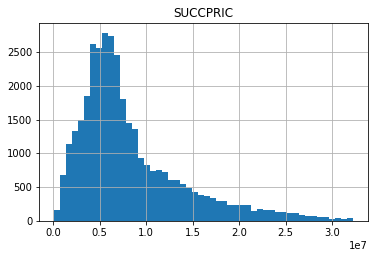

In [296]:
plotHistogram(df, ['SUCCPRIC'])

In [295]:
# 데이터 시각화
def plotHistogram(_df, columns):
    if type(columns) != list :
        print("columns 타입이 리스트가 아닙니다.")
    
        return
    
    for _n, i in enumerate(columns):
        df.describe()
        fig=plt.figure(figsize=(20,8))
        fig.patch.set_facecolor('xkcd:white')

        plt.subplot(2,3,_n + 1)
        plt.title(i)
        df.loc[:,i].hist(bins=50)
    plt.show()